#### Implement the following applications using any two machine learning algorithms and compare them.

## OBJECT/IMAGE DETECTION

In this notebook, I used small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. ANN and CNN will be used for classification. We will see which model is more accurate and performs well.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 663s 4us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

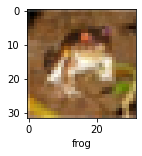

In [10]:
plot_sample(X_train, y_train, 0)

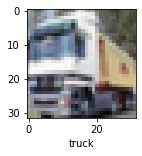

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.8132 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6217 - accuracy: 0.4294
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5412 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4823 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4329 - accuracy: 0.4946


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.45      0.54      1000
           1       0.70      0.49      0.58      1000
           2       0.45      0.24      0.31      1000
           3       0.28      0.56      0.37      1000
           4       0.55      0.24      0.33      1000
           5       0.39      0.31      0.35      1000
           6       0.56      0.48      0.52      1000
           7       0.44      0.67      0.53      1000
           8       0.58      0.66      0.62      1000
           9       0.48      0.65      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4468 - accuracy: 0.4807
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1097 - accuracy: 0.6113
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9726 - accuracy: 0.6613
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8803 - accuracy: 0.6954
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8095 - accuracy: 0.7189
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7562 - accuracy: 0.7362
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7002 - accuracy: 0.7569
Epoch 8/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6591 - accuracy: 0.7690
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6136 - accuracy: 0.7867
Epoch 10/10
1563/1563 [==============================] - 24s 15m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9612 - accuracy: 0.6869


[0.9612328410148621, 0.6869000196456909]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.7654570e-04, 1.0942988e-05, 1.4295746e-03, 5.3305662e-01,
        3.0313646e-05, 4.5861924e-01, 3.5338283e-03, 3.3857297e-05,
        2.9926756e-03, 1.6423737e-05],
       [2.8124149e-03, 3.4656245e-03, 2.3304042e-06, 2.6768064e-05,
        4.5927802e-08, 1.1700337e-07, 2.4905491e-08, 8.6715247e-08,
        9.9333632e-01, 3.5632239e-04],
       [7.5529285e-02, 4.4109643e-01, 5.3930297e-03, 1.2590332e-01,
        2.3762372e-03, 1.1573099e-02, 1.0057054e-02, 9.1768149e-03,
        1.2782316e-01, 1.9107153e-01],
       [9.6596652e-01, 3.0636624e-03, 2.2739647e-03, 9.4125886e-03,
        1.0040339e-02, 1.9888092e-04, 6.4176036e-04, 9.9994021e-04,
        6.9755437e-03, 4.2669321e-04],
       [1.6227494e-05, 2.4377236e-04, 1.0924349e-02, 2.4678547e-02,
        6.1117297e-01, 5.7565022e-02, 2.9527742e-01, 3.3739303e-05,
        8.5905915e-05, 2.0197144e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

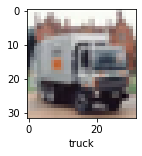

In [25]:
plot_sample(X_test, y_test,11)

In [26]:
classes[y_classes[11]]

'truck'

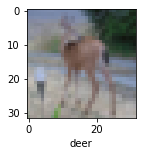

In [27]:
plot_sample(X_test, y_test,100)

In [28]:
classes[y_classes[100]]

'deer'

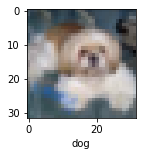

In [38]:
plot_sample(X_test, y_test,39)

In [39]:
classes[y_classes[39]]

'dog'

### CONCLUSION:
   ## CNN PERFORMS BETTER AND IS MORE ACCURATE.